<a href="https://colab.research.google.com/github/guerrinha77/Atividade-M18/blob/main/Projeto_de_parceria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJETO DE PARCERIA**

<ol type="1">
  <li>Coleta de dados</li>
  <li>Modelagem</li>
  <li>Conclusões</li>
</ol>

---

## Coleta de dados

A problemática escolhida para esse projeto é baseada no dataset Healthy-Lifestyle (2021) disponivel em:https://www.kaggle.com/datasets/tan5577/healthy-life-style-dataset2025

O arquivo csv contém dados relacionados a qualidade de vida de várias cidades ao redor do mundo, a ideia é utilizar esse dados para agrupar e contextualizar a situação dessas cidades.

As variáveis escolhidas para fazer isso foram a taxa de obesidade (do país), o nivel de felicidade (do país) e a expectativa de vida (do país).

In [75]:
import sklearn
import pandas as pd
import seaborn as sns
import pandas as pd

from sklearn.cluster import KMeans
from google.colab import files

In [76]:
files.upload();

Saving Healthy-Lifestyle (2021).csv to Healthy-Lifestyle (2021) (1).csv


## Modelagem

Crie o dataframe Pandas na variável `fortune_df` através da leitura do arquivo `fortune.csv`

In [77]:
df = pd.read_csv("Healthy-Lifestyle (2021).csv")

In [78]:
df.head()

,City,Rank,Sunshine hours (City),Cost of a bottle of water (City),Obesity levels (Country),Life expectancy (years) (Country),Pollution (Index score) (City),Annual avg. hours worked,Outdoor activities (City),Number of take out places (City),Cost of a monthly gym membership (City),Happiness levels (Country)
0,Amsterdam,1,1858.0,£1.92,20.40%,81.2,30.93,1434,422,1048,£34.90,7.44
1,Sydney,2,2636.0,£1.48,29.00%,82.1,26.86,1712,406,1103,£41.66,7.22
2,Vienna,3,1884.0,£1.94,20.10%,81.0,17.33,1501,132,1008,£25.74,7.29
3,Stockholm,4,1821.0,£1.72,20.60%,81.8,19.63,1452,129,598,£37.31,7.35
4,Copenhagen,5,1630.0,£2.19,19.70%,79.8,21.24,1380,154,523,£32.53,7.64


In [79]:
df.columns

Index(['City', 'Rank', 'Sunshine hours (City)',
       'Cost of a bottle of water (City)', 'Obesity levels (Country)',
       'Life expectancy (years)  (Country)', 'Pollution (Index score)  (City)',
       'Annual avg. hours worked', 'Outdoor activities (City)',
       'Number of take out places (City)',
       'Cost of a monthly gym membership (City)',
       'Happiness levels (Country)'],
      dtype='object')

In [80]:
df = df.drop(columns = ['Rank', 'Sunshine hours (City)', 'Cost of a bottle of water (City)', 'Pollution (Index score)  (City)', 'Annual avg. hours worked', 'Outdoor activities (City)', 'Number of take out places (City)', 'Cost of a monthly gym membership (City)'])

In [81]:
df.isnull().any()

,0
City,False
Obesity levels (Country),False
Life expectancy (years) (Country),False
Happiness levels (Country),False


In [82]:
for x in range(0,len(df)):
    df.iloc[x,1] = df.iloc[x,1][0:-1]

In [83]:
df.columns = ['Cidade', 'Taxa de Obesidade (%)',
       'Expectativa de Vida (anos)', 'Nivel de Felicidade']

In [84]:
df['Taxa de Obesidade (%)'] = df['Taxa de Obesidade (%)'].astype(float)

In [85]:
min = df[df.columns[1]].min()
max = df[df.columns[1]].max()

df['Taxa de Obesidade (%)'] = df[df.columns[1]].apply(lambda grade: (grade - min) / (max - min))

min = df[df.columns[2]].min()
max = df[df.columns[2]].max()
df['Expectativa de Vida (anos)'] = df[df.columns[2]].apply(lambda grade: (grade - min) / (max - min))

min = df[df.columns[3]].min()
max = df[df.columns[3]].max()

df['Nivel de Felicidade'] = df[df.columns[3]].apply(lambda grade: (grade - min) / (max - min))

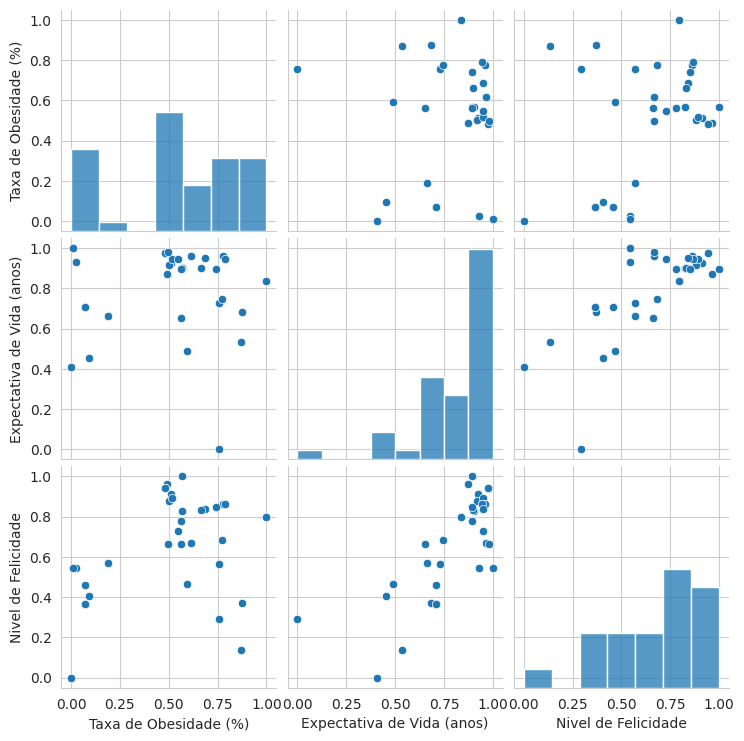

In [86]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=df)

In [87]:
data = df.drop(['Cidade'], axis=1)

In [88]:
wcss = []

for k in range(1,11):

    model = KMeans(n_clusters = k)
    model = model.fit(df.drop(['Cidade'], axis=1))
    wcss.append(model.inertia_)

In [89]:
print(wcss)

[8.317517527893548, 4.147531224717915, 2.5033434188974457, 1.7690193818900068, 1.3721644210886104, 1.2212936761250537, 0.9211259118277557, 0.704768011188354, 0.6757405568806686, 0.3770333754119503]


/tmp/ipython-input-3836599178.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  gráfico = sns.lineplot(x = range(1,11), y = wcss, marker = '8', palette = 'pastel')


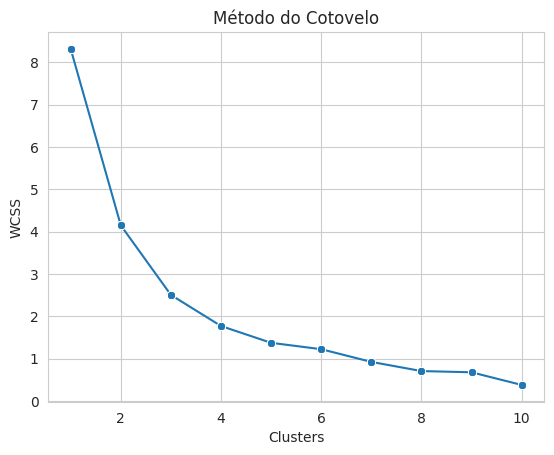

In [90]:
with sns.axes_style('whitegrid'):

    gráfico = sns.lineplot(x = range(1,11), y = wcss, marker = '8', palette = 'pastel')
    gráfico.set(title = 'Método do Cotovelo', ylabel = 'WCSS', xlabel = 'Clusters');

Pelo metodo do cotovelo vemos que 3 clusters é um número razoável.

In [91]:
model = KMeans(n_clusters=3)
model = model.fit(data)

In [92]:
model.labels_

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 0, 0, 2,
       2, 1, 2, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2],
      dtype=int32)

In [93]:
data['cluster'] = pd.Series(model.labels_)

In [94]:
data.head()

,Taxa de Obesidade (%),Expectativa de Vida (anos),Nivel de Felicidade,cluster
0,0.510836,0.925651,0.914894,0
1,0.777090,0.959108,0.862884,0
2,0.501548,0.918216,0.879433,0
3,0.517028,0.947955,0.893617,0
4,0.489164,0.873606,0.962175,0


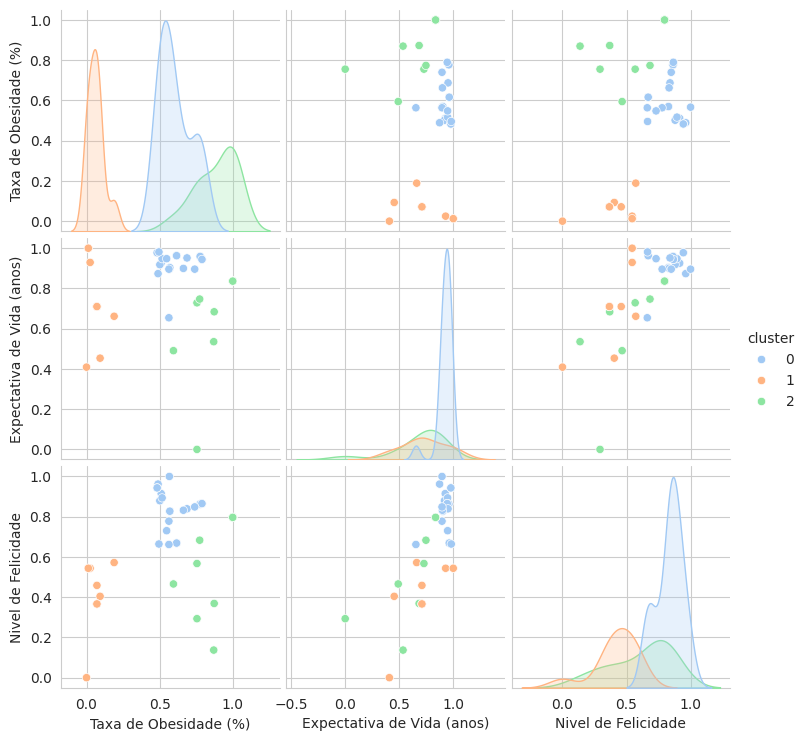

In [95]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=data, hue = 'cluster', palette = 'pastel')

## Conclusões

Observando os gráficos podemos notar que os agrupamentos de cidades com maior expectativa de vida e maior nivel de felicidade são aquela com taxa de obesidade próxima do centro do gráfico entre 0,5 e 0,75.

O cluster 2 é um grupo formado por cidades com taxa de obesidade alta porém expectativa de vida também alta, nivel de felicidade bem disperso.

Já o cluster 1 tem taxa de obesidade baixa, porém sem cidades com nivel de felicidade alto e sem cidades com expectativa de vida baixa.

Pelos resultados obtidos podemos concluir que cidades mais "felizes" são aquelas sem um taxa de obesidade alta e com uma expectativa de vida alta.